In [1]:
# include matplotlib pandas
import matplotlib.pyplot as plt
import pandas as pd

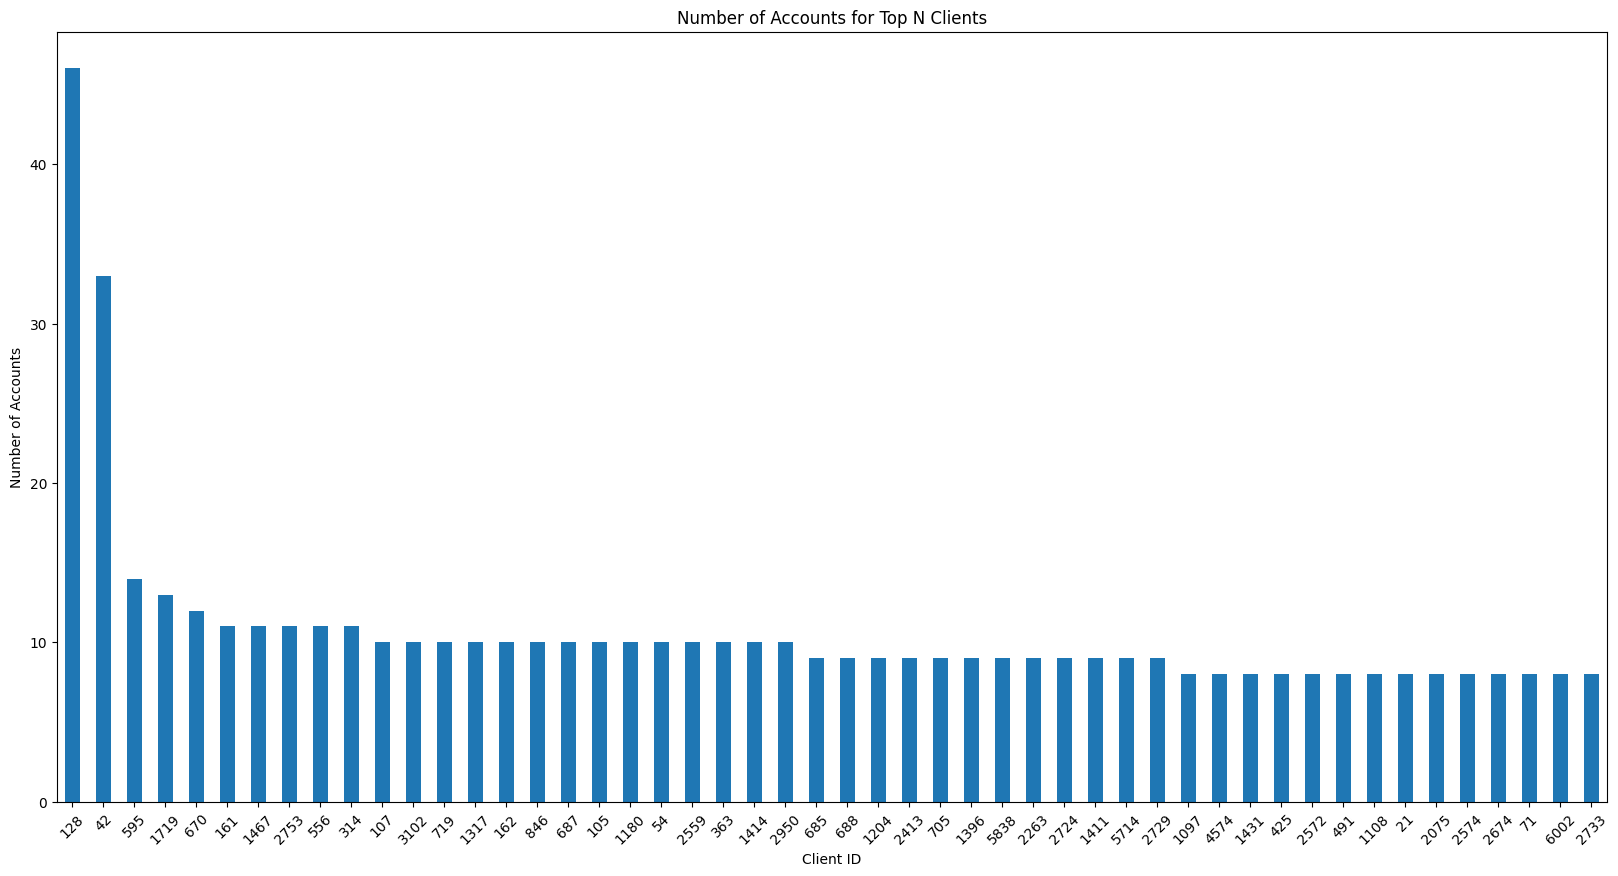

In [2]:
# read the data
clients_data = pd.read_csv('clients_data_competition.csv')

# plot account id with client id to check how many accounts owned by a client
# Calculate the number of accounts per client and sort it
accounts_per_client = clients_data['Client ID'].value_counts().sort_values(ascending=False)

# Optionally, select the top N clients to keep the plot readable
top_n = 50  # Adjust N based on your preference or dataset size
accounts_per_client_top_n = accounts_per_client.head(top_n)

plt.figure(figsize=(20, 10))  # Adjust the figure size as necessary
accounts_per_client_top_n.plot(kind='bar')

plt.title('Number of Accounts for Top N Clients')
plt.xlabel('Client ID')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()


### Data preprocessing

In [3]:
# change Client Type Name to 0 (Individual) and 1 (Companies)
clients_data['Client Type Name'] = clients_data['Client Type Name'].map({'Individuals': 0, 'Companies': 1})

In [4]:
# make -1 in Is Dormant column to 1
clients_data['Is Dormant'] = clients_data['Is Dormant'].replace(-1.0, 1).astype(int)

# add column to calculate time since OpenDate in years
# add column to calculate time since BirthDate in years
# make them to 1 decimal point
clients_data['OpenDate'] = pd.to_datetime(clients_data['OpenDate'])
clients_data['BirthDate'] = pd.to_datetime(clients_data['BirthDate'])
clients_data['Years Since Open'] = ((pd.Timestamp.now() - clients_data['OpenDate']).dt.days / 365.25).astype(int)
clients_data['Years Since Birth'] = ((pd.Timestamp.now() - clients_data['BirthDate']).dt.days / 365.25).astype(int)



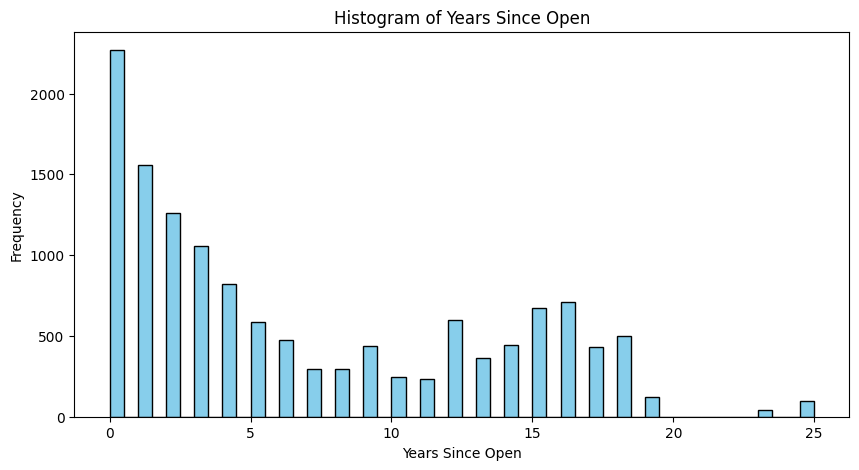

In [5]:
# histogram of Years Since Open
plt.figure(figsize=(10, 5))
plt.hist(clients_data['Years Since Open'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Years Since Open')
plt.xlabel('Years Since Open')
plt.ylabel('Frequency')
plt.show()

In [6]:
clients_data.head()

,Client ID,Account ID,Gender,Risk Rate,Company Name,Is Closed,Is Dormant,Is Profile Suspended,Is Client Suspended,Client Type Name,OpenDate,BirthDate,Years Since Open,Years Since Birth
0,0,0,Male,Low,HSB,0,0,0,0,0,2014-02-16,1990-07-27,10,33
1,1,1,Female,Low,HSB,0,1,1,0,0,2014-02-16,1963-10-22,10,60
2,2,2,Male,Low,HSB,0,0,0,0,0,2014-02-17,1971-05-14,10,52
3,3,3,Male,Low,HSB,0,0,0,0,0,2014-02-17,1953-01-14,10,71
4,4,4,Male,Low,HSB,0,0,0,0,0,2014-02-17,1976-06-09,10,47


### Visualization of the problem to decide what is the churn

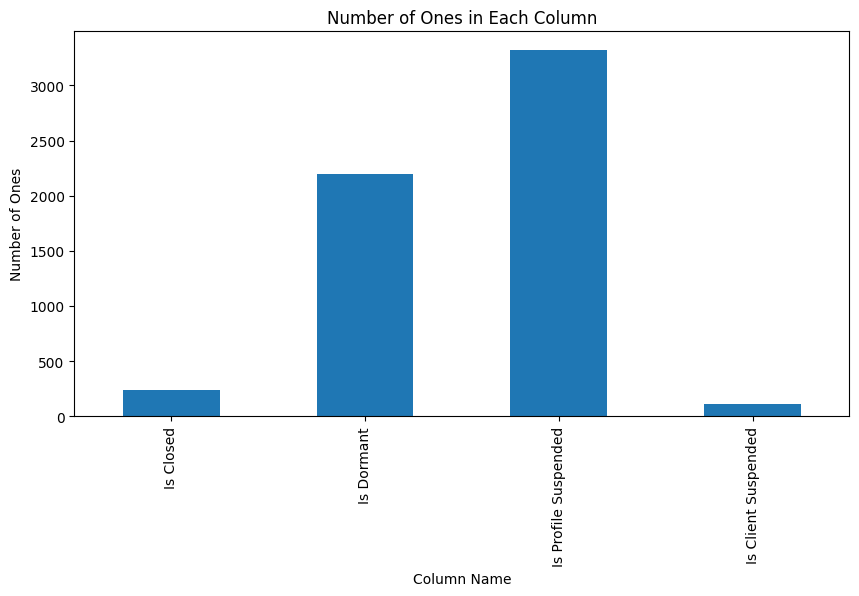

In [7]:
# count ones in Is Closed Is Dormant Is Profile Suspended cIs Client Suspended
# Calculate the number of ones in each column
ones_count = clients_data[['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']].sum()

# Plot the number of ones in each column
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
ones_count.plot(kind='bar')

plt.title('Number of Ones in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Number of Ones')

plt.show()

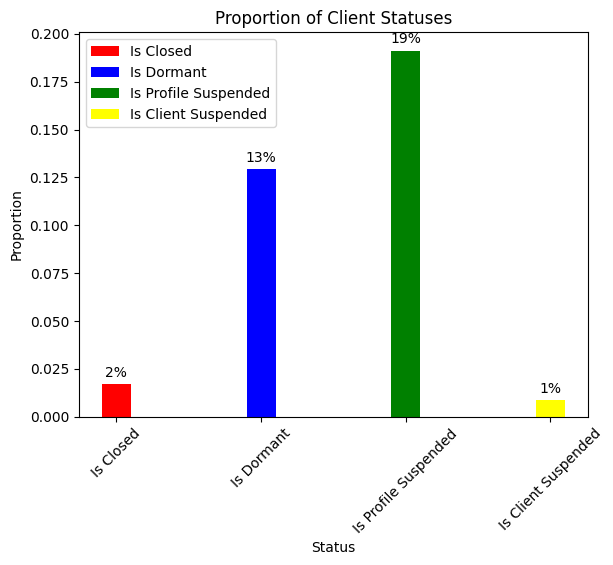

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'True' is represented as 1 and 'False' as 0, calculate the proportion of each status
statuses = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']
data = [clients_data[status].mean() for status in statuses]

# Set up the bar chart
x = np.arange(len(statuses))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, data, width, label=statuses, color=['red', 'blue', 'green', 'yellow'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Status')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Client Statuses')
ax.set_xticks(x)
ax.set_xticklabels(statuses)
ax.legend()


def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        percent_height = height * 100
        ax.annotate('{:.2f}%'.format(percent_height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bars)

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()


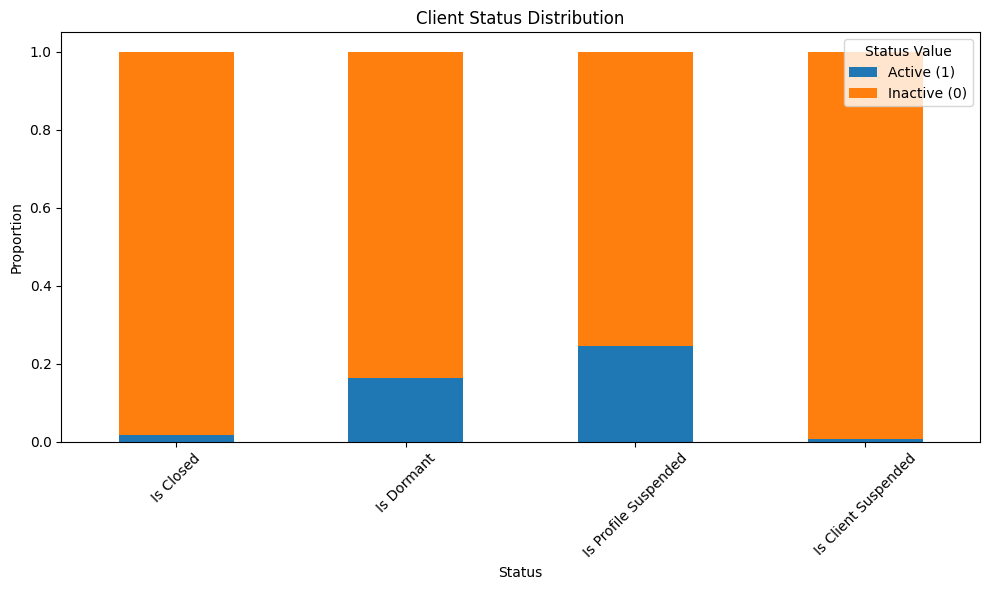

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming clients_data is your DataFrame and it's already loaded
status_columns = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Calculate proportions of 1s for each status
status_proportions = pd.DataFrame({
    status: {
        'Active (1)': clients_data[status].mean(),
        'Inactive (0)': 1 - clients_data[status].mean()
    } for status in status_columns
})

# Transposing the DataFrame for easier plotting
status_proportions = status_proportions.T

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
status_proportions.plot(kind='bar', ax=ax, stacked=True)

ax.set_title('Client Status Distribution')
ax.set_ylabel('Proportion')
ax.set_xlabel('Status')
ax.legend(title='Status Value', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### It is Clear that Is Profile Suspended got the highest counts

### Check if there only should be one status for each user

In [10]:
# Specify the columns to check
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Calculate the sum of '1's for each row across the specified columns
sum_of_ones = clients_data[columns_to_check].sum(axis=1)

# Check if any row has exactly one '1' across the specified columns
has_exactly_one = (sum_of_ones == 1).all()

print(has_exactly_one)

False


In [11]:
# pip install matplotlib==3.1.0

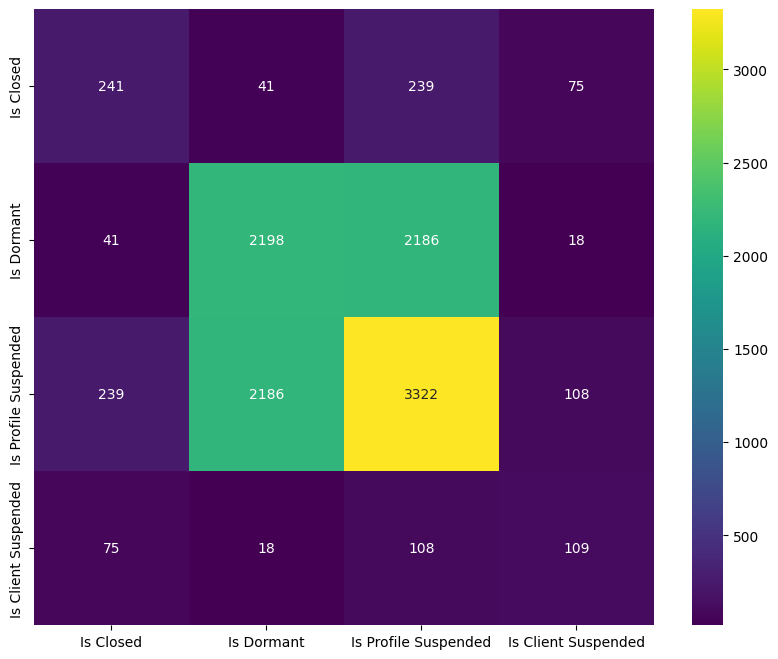

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the co-occurrence matrix
# Assuming that 'clients_data' is already loaded and contains the columns of interest
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']
co_occurrence_matrix = pd.DataFrame(0, index=columns_to_check, columns=columns_to_check)

for i in columns_to_check:
    for j in columns_to_check:
        co_occurrence_matrix.loc[i, j] = np.logical_and(clients_data[i] == 1, clients_data[j] == 1).sum()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
# Ensure that annot is a DataFrame with the same shape as the data to force display of all numbers
sns.heatmap(co_occurrence_matrix, annot=co_occurrence_matrix, fmt="d", cmap='viridis')

plt.show()


In [13]:
# most common case is when a client is profile suspended alone and is domant alone
# second most common case is when a client is suspended and dormant

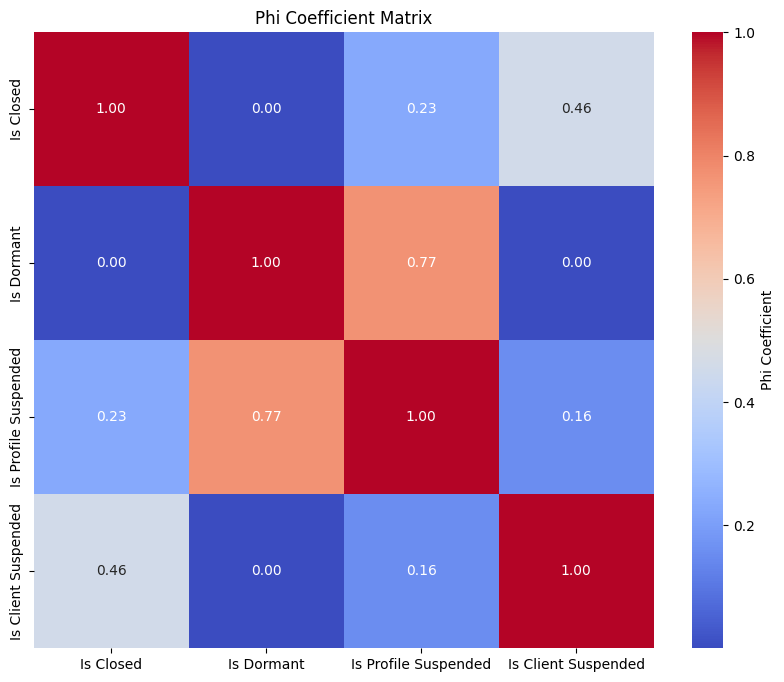

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# phi coefficient is a measure of association between two binary variables

# Define the columns to check
columns_to_check = ['Is Closed', 'Is Dormant', 'Is Profile Suspended', 'Is Client Suspended']

# Initialize an empty DataFrame to store the Phi coefficients
phi_coefficients = pd.DataFrame(index=columns_to_check, columns=columns_to_check, dtype=float)

for i in columns_to_check:
    for j in columns_to_check:
        contingency_table = pd.crosstab(clients_data[i], clients_data[j])
        # Calculate the Phi coefficient
        phi = (contingency_table.iloc[1, 1] * contingency_table.iloc[0, 0] - contingency_table.iloc[0, 1] * contingency_table.iloc[1, 0]) / np.sqrt((contingency_table.iloc[:, 1].sum() * contingency_table.iloc[:, 0].sum() * contingency_table.iloc[1].sum() * contingency_table.iloc[0].sum()))
        phi_coefficients.loc[i, j] = phi

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(phi_coefficients, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Phi Coefficient'})
plt.title('Phi Coefficient Matrix')
plt.show()


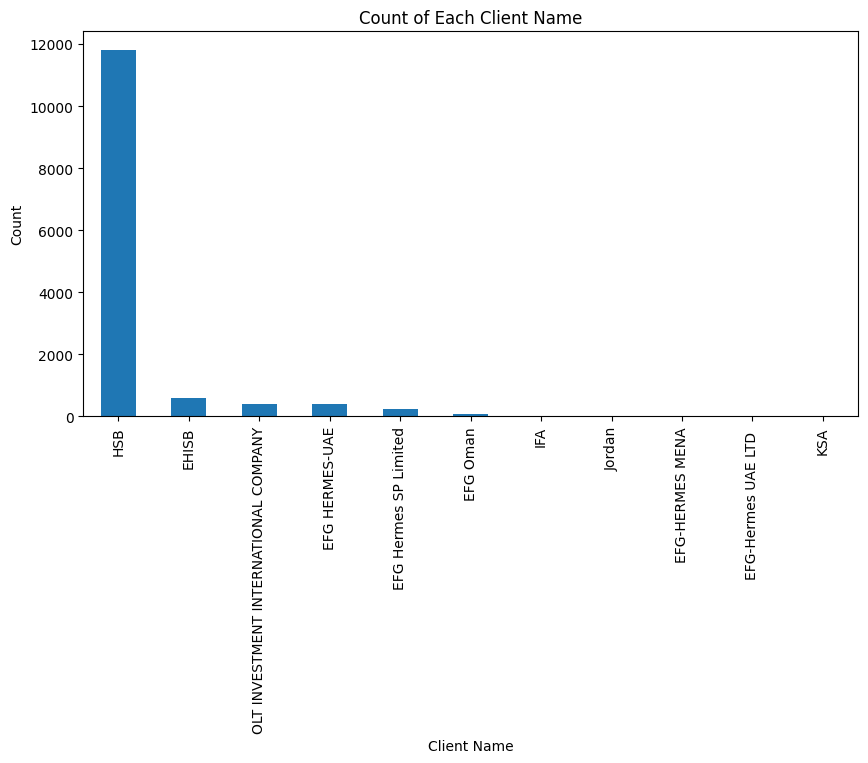

In [15]:
# get count of each client name
# Calculate the count of each client name
client_name_counts = clients_data['Company Name'].value_counts()

# Plot the count of each client name
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
client_name_counts.plot(kind='bar')

plt.title('Count of Each Client Name')
plt.xlabel('Client Name')
plt.ylabel('Count')

plt.show()

In [16]:
# Drop rows with names different than 'HSB'
clients_data = clients_data[clients_data['Company Name'] == 'HSB']

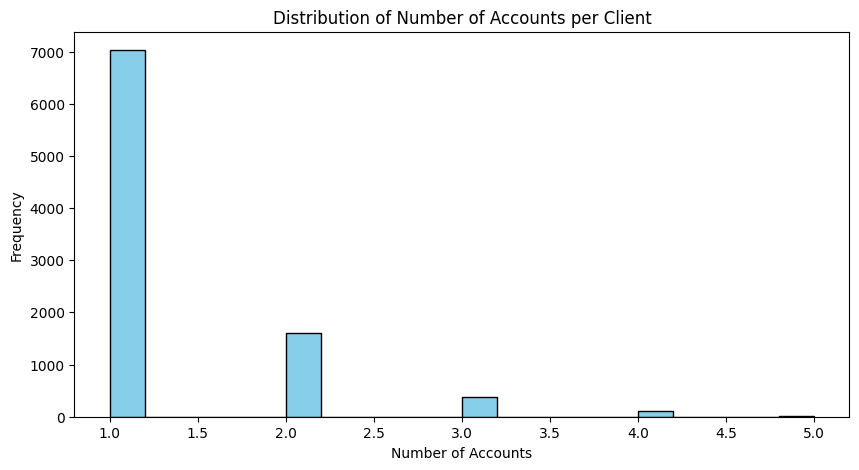

In [17]:
# get distribution of client numbers with account numbers
# Calculate the number of accounts per client
accounts_per_client = clients_data['Client ID'].value_counts()

# Plot the distribution of the number of accounts per client
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
plt.hist(accounts_per_client, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Accounts per Client')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.show()

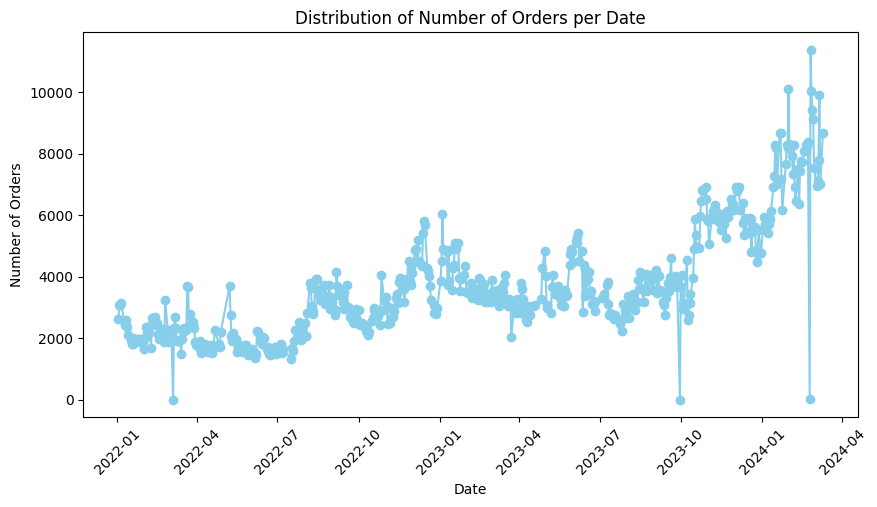

In [18]:
# load orders_data_competition.csv
order_data = pd.read_csv('orders_data_competition.csv')

# merge clients_data and order_data
# get distribution of Order Time

Date = pd.to_datetime(order_data['Order Time'])

# remove the time part
Date = Date.dt.date

# Count the number of orders for each date
order_count_per_date = Date.value_counts()

# Plot the distribution of the number of orders per date
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
order_count_per_date.plot(kind='line', marker='o', color='skyblue')

plt.title('Distribution of Number of Orders per Date')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

plt.show()

In [19]:
# for each account number get last order date
# Convert 'Order Time' to datetime
order_data['Order Time'] = pd.to_datetime(order_data['Order Time'])

# Get the last order date for each account number
last_order_date_per_account = order_data.groupby('Account ID')['Order Time'].max()

last_order_date_per_account

Account ID
0       2022-10-19 12:24:04
1       2022-09-14 12:56:56
2       2024-02-28 11:06:33
3       2024-03-10 12:32:34
4       2024-02-26 12:47:33
                ...        
13517   2024-03-10 09:47:57
13518   2024-03-10 13:16:00
13519   2024-03-10 14:28:58
13520   2024-03-10 14:22:37
13521   2024-03-10 13:02:30
Name: Order Time, Length: 9729, dtype: datetime64[ns]